# Arquivo com os scripts deve ser enviado no link  
https://docs.google.com/forms/d/e/1FAIpQLSc9t0PsDPLfaK3chSqh5Etq2hkjOzkgtgox4A8C8L2TsSEvfA/viewform  

Prazo: 10/07/2020, 18:00 h.

# PARTE 1: DEFINIÇÃO DE CONCEITOS (Valor Total: 2,0)

# **OBSERVAÇÕES**:  

# - Entre as três questões apresentadas, ESCOLHA DUAS para responder.   

# - Valor de cada questão: 1,0

# - Respostas com MÁXIMO CINCO LINHAS.

## Questão 1.1.

Certamente, o ideal é que os resultados de um modelo não apresentem 
‘Falsos Positivos’ nem ‘Falsos Negativos’.   

Porém, se isso ocorrer, é melhor o modelo apresentar uma quantidade
maior de ‘Falso Positivo’ ou de ‘Falso Negativo’?   

**JUSTIFIQUE** sua resposta e **APRESENTE UM EXEMPLO** ilustrativo.


In [ ]:
# Espaço para responder Questão 1.1.

## Questão 1.2.

O que é ‘Balanceamento de Dados’?  

Quais as principais abordagens para balancear um conjunto de dados?  

Em que momento do processo deve ser feito?  
Antes ou depois da criação de conjuntos de treino e teste? Por que?


In [ ]:
# Espaço para responder Questão 1.2.
Balanceamentos dos dados, é quando o conjunto se apresenta desbalanceado, de uma forma que tenha muitos valores para "1" e poucos valores para "0"
Para esses casos é necessário o balanceamento de dados, onde visa diminuir essa diferença.
As principais abordagens, trabalhadas em python, são Tomek e SMOTE.
Se faz o balanceamento antes da divisão do conjunto (train test split).
Já que antecede a criação do modelo, o algorítimo a ser trabalhado, é necessario seu balanceamento antes de sua aplicação.

## Questão 1.3.

O que são, para que servem e como são criados conjuntos de ‘Treino’, ‘Teste’ e ‘Validação’?

In [ ]:
# Espaço para responder Questão 1.3.
A criação desses conjuntos, são feitas para que o modelo (algoritimo) a ser criado, faça literalmente, treine, teste e valide.
No treino, é onde o algoritimo vai trabalhar e processar todos os dados do conjunto.
No teste, o algoritimo, após processado, vai testar os valores gerados pelo conjunto de treino.
A validação, se dá pela finalizaçã do model. Com esse conjunto, pode-se avaliar a eficacia, comparando os valores preditos pelo modelo com este.

# EXPLICAÇÃO DO CONJUNTO DE DADOS  

* Considere o conjunto de dados FA084-P1-Dataset-UCR.csv  
* Trata-se de um conjunto de dados de produção da Usina Costa Rica, do Grupo ATVOS.  
* Descrição dos atributos:  

Nome       | Descrição  
--- | ---  
safra:     | Ano da Safra (Plantio/Colheita): 21213 (2012/2013), 21314 (2013/2014), etc.
codFaz:    | Código da Fazenda onde se realizou a colheita
bloco:     | Bloco onde se realizou a colheita
talhao:    | Talhão onde se realizou a colheita
estagio:   | Número de corte da colheita: 1° corte (12m, 15M e 18m), 2° corte, 3° corte, etc.
variedade: | Variedade da cana
usina:     | Código da Usina
ambProd:   | Ambiente de Produção do talhão
tchEst:    | Produtividade (TCH, t/ha) ESTIMADA do talhão
tchReal:   | Produtividade (TCH, t/ha) REAL do talhão (colhida)
days:      | Intervalo (em dias) entre a última colheita e a colheita anterior


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('FA084-P1-Dataset-UCR.csv')
df.head()

,Unnamed: 0,safra,codFaz,bloco,talhao,estagio,variedade,usina,ambProd,tchEst,tchReal,days
0,0,21213,430001,1,1,4,RB855453,COR,B,60.0,56.30,412
1,1,21213,430001,1,2,4,SP813250,COR,B,80.0,75.07,412
2,2,21213,430001,1,3,4,SP813250,COR,B,80.0,74.95,407
3,3,21213,430001,1,4,4,SP813250,COR,B,80.0,72.89,402
4,4,21213,430001,1,5,4,RB72454,COR,F,80.0,75.08,388


In [7]:
df.shape

(4065, 12)

# PARTE 2: EXPLORAÇÃO DO CONJUNTO DE DADOS (Valor Total: 3,0)

# Para responder as questões 2.1 a 2.4, as instruções dos itens A, B e C devem ser atendidas

## 2.A) Mantenha apenas os dados das QUATRO SAFRAS COM MAIOR NÚMERO DE REGISTROS 
##    (safras 2012/2013, 2013/2014, 2014/2015 e 2015/2016), DESCARTANDO OS DEMAIS REGISTROS

In [8]:
df.safra.value_counts()

21516    1196
21415    1144
21314     981
21213     670
21112      65
21617       9
Name: safra, dtype: int64

In [45]:
# Espaço para script visando manter as quatro safras com maior número de registros e
# DESCARTAR OS DEMAIS REGISTROS
df = df.drop(df[df.safra == 21112].index)
df = df.drop(df[df.safra == 21617].index)

In [10]:
df.safra.value_counts()

21516    1196
21415    1144
21314     981
21213     670
Name: safra, dtype: int64

## 2.B) Mantenha apenas os dados das TRÊS VARIEDADES COM MAIOR NÚMERO DE REGISTROS 
##    (RB867515, SP813250 e RB855453), DESCARTANDO OS DEMAIS REGISTROS

In [14]:
df.variedade.value_counts()

RB867515     1765
SP813250      745
RB855453      524
SP80-1842     370
RB835054      248
RB835486      108
SP83-2847      70
SP80-3280      61
RB72454        40
SP91-1049      37
RB92579        19
RB966928        4
Name: variedade, dtype: int64

In [46]:
# Espaço para script visando manter as três variedades com maior número de registros e
# DESCARTAR OS DEMAIS REGISTROS
df = df[(df.variedade.isin(["RB867515", "SP813250", "RB855453"]))] 

In [33]:
df.variedade.value_counts(1)

RB867515    0.577108
SP813250    0.247087
RB855453    0.175805
Name: variedade, dtype: float64

## 2.C) Com relação ao Estágio (número de cortes)

## 2.C.1) Estágios ‘12m’, ‘15M’ e ‘18m’ são CANA PLANTA (1° corte)
* O que os diferencia é se são cana de 12 meses, 15 meses ou 18 meses.  
* Assim, para que todos esses registros sejam ‘cana de primeiro corte’, considere todos como estágio **‘1’**.  


## 2.C.2) Mantenha apenas os dados dos registros DOS CINCO PRIMEIROS CORTES  
### (cortes de 1 a 5), DESCARTANDO OS DEMAIS REGISTROS 


In [19]:
df.estagio.value_counts()

1    869
2    716
3    548
4    509
5    276
6     95
7     21
Name: estagio, dtype: int64

In [47]:
# Espaço para script visando trocar '12m', '15M' e '18m' por '1'
df = df.replace(to_replace='12m', value='1')
df = df.replace(to_replace='15M', value='1')
df = df.replace(to_replace='18m', value='1')

In [48]:
# Espaço para script visando manterr apenas registros dos cinco primeiros cortes e
# DESCARTAR OS DEMAIS REGISTROS
df = df.drop(df[df.estagio == '6'].index)
df = df.drop(df[df.estagio == '7'].index)
# DICA: Verificar tipo de variável. Se necessário, transformar de 'object' para 'int'

In [49]:
df.estagio.value_counts()

1    869
2    716
3    548
4    509
5    276
Name: estagio, dtype: int64

In [50]:
# ==> CHECK-POINT <==
# Dimensões do DataFrame após as alterações: (2918, 12)
df.shape

(2918, 12)

## Questão 2.1 (Valor: 0,50)

### Faça uma análise dos resultados encontrados nos itens 2.1.A e 2.1.B 

### Espaço para responder Questão 2.1

In [ ]:
# Espaço para responder Questão 2.1.
Com as médias feitas, é observado que a produtividade real se manteve maior para estágio de corte menores. Ou seja,
para o primeiro corte, observamos uma média de de produtividade muito maior do que para o quinto corte.

Com as médias feitas da variedade em relação a produtividade real, observamos que a melhor variedade, em relação as outras, é a RB855453,
tanto é que é a mais usada pela usina, onde cerca de 57,7% de sua cana são dessa variedade.

### 2.1.A) Qual a MÉDIA DE PRODUTIVIDADE REAL da cana para cada ESTÁGIO DE CORTE?

In [30]:
# Espaço para script visando calcular a MÉDIA DE PRODUTIVIDADE REAL da cana para cada ESTÁGIO DE CORTE
df.groupby('estagio').tchReal.mean()

estagio
1    78.154522
2    73.566020
3    71.067044
4    62.353084
5    51.157029
Name: tchReal, dtype: float64

### 2.1.B) Qual a MÉDIA DE PRODUTIVIDADE REAL da cana para cada VARIEDADE?

In [31]:
# Espaço para script visando calcular a MÉDIA DE PRODUTIVIDADE REAL da cana para cada VARIEDADE
df.groupby('variedade').tchReal.mean()

variedade
RB855453    87.103314
RB867515    69.151716
SP813250    61.381221
Name: tchReal, dtype: float64

## Questão 2.2 (Valor: 0,50)

### Faça uma análise dos resultados encontrados nas figuras 2.2.A e 2.2.B

### Espaço para responder Questão 2.2

In [ ]:
# Espaço para responder Questão 2.2.
Com o boxplot feito para o estagio e a produção real, observamos e confirmamos o que foi dito no item 2.1.A e 2.1B, 
onde as produções foram próximas para cada estágio, decaindo com o aumento do estagio de corte assim como a maior produção (RB855453).

Uma característica, não só do boxplot, são os outliers, onde observamos pontos que estão muito longe da média dos valores,
podemos observar esses valores para o estágio 3, por exemplo, onde temos ponto muito alto em relação aos outros. 

### 2.2.A) 'Boxplot' da PRODUTIVIDADE REAL da cana para cada ESTÁGIO DE CORTE.  


In [37]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


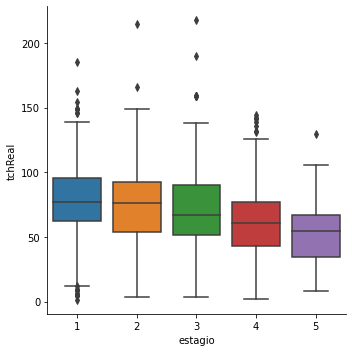

In [40]:
# Espaço para o script visando gerar 'Boxplot' da PRODUTIVIDADE REAL para cada Estágio de Corte
sns.catplot(x='estagio', y='tchReal', kind='box', data=df);

### 2.2.B) 'Boxplot' da PRODUTIVIDADE REAL da cana para cada VARIEDADE  

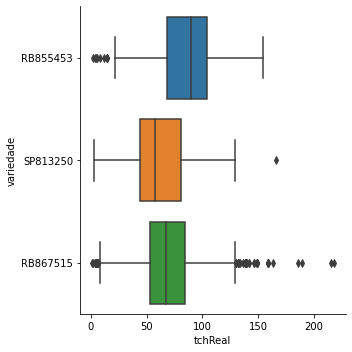

In [38]:
# Espaço para o script 2.2.B)
# 2.2.B) 'Boxplot' da PRODUTIVIDADE REAL para cada Variedade
sns.catplot(x='tchReal', y='variedade', kind='box', data=df);

## 2.3 (Valor: 1,5)

## Considere o erro entre a produtividade estimada e a produtividade real (colhida).

In [51]:
# Espaço para o script visando criar atributo relativo ao erro entre a produtividade estimada (tchEst) e a produtividade real (tchReal)
df['err_tch'] = abs(df.tchEst - df.tchReal)

In [52]:
df.head()

,Unnamed: 0,safra,codFaz,bloco,talhao,estagio,variedade,usina,ambProd,tchEst,tchReal,days,err_tch
0,0,21213,430001,1,1,4,RB855453,COR,B,60.0,56.30,412,3.70
1,1,21213,430001,1,2,4,SP813250,COR,B,80.0,75.07,412,4.93
2,2,21213,430001,1,3,4,SP813250,COR,B,80.0,74.95,407,5.05
3,3,21213,430001,1,4,4,SP813250,COR,B,80.0,72.89,402,7.11
10,10,21213,430001,1,10,4,RB855453,COR,B,60.0,56.29,412,3.71


## Questão 2.3.A (Valor: 0,75)

* Faça uma análise crítica dos resultados obtidos com as figuras solicitadas:
  - Histograma dos erros entre as produtividades estimada (tchEst) e real (tchReal)  
    - Geral  
    - Por variedade  
    - Por estágio (número de corte)  
  - Gráfico 'scatter' comparando os valores absolutos de tchReal (eixo x) e tchEst (eixo y).  
  DICA: Embora não seja obrigatório, se fizer esse gráfico separando por cores de acordo,  
  com alguns grupos, a análise pode ficar mais rica

### Espaço para responder Questão 2.3.A

In [ ]:
# Espaço para a análise crítica relativa à Questão 2.3.A
A maior parte dos erros entre a produçao esperada e a real se ta concentrada entre, aproximadamente, 0 e 10, isto mostra que teve uma boa estimativa,
porém, também é observado erros até a 145, que podem afetar totalmente a economia voltada para a produção.

Foi observado também, como dito, a variedade da cana RB855453 é a melhor entre as outras, afinal, os erros estimados foram bem baixo em relação as outras,
assim como sua produção maior, seus erros também foram.

Para o estágio, a maior parte dos erros cometidos pelo estágio de corte 1, se dão em pequenos valores, enquanto que para estágios mais altos os erros foram maiores,
porém para o estágio de corte 5, observamos uma quantidade bem pequena de erro em relação os outros.

Os erros estimados e reais, podem se concluir que foram bons, já que estão, visivelmente próximos a diagonal do gráfico, assim, sendo ótimos valores,
porém ainda vemos alguns pontos mais dispersos desta diagonal.

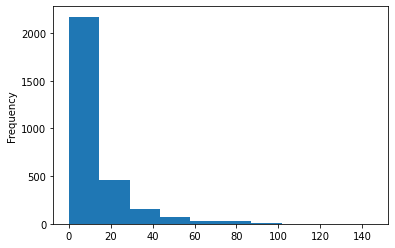

In [55]:
# Espaço para o script do Histograma Geral
df.err_tch.plot.hist();

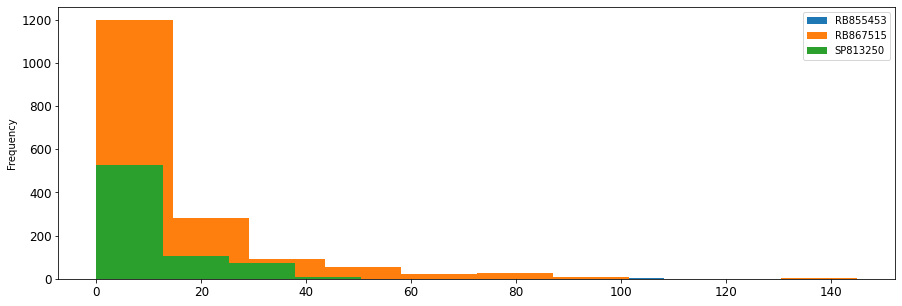

In [63]:
# Espaço para o script do Histograma por Variedade
ax = df.groupby('variedade').err_tch.plot(kind='hist', figsize=(15, 5), legend=True, fontsize=12)
plt.show()

In [65]:
df.err_tch.describe()

count    2918.000000
mean       11.110751
std        15.468763
min         0.000000
25%         0.452500
50%         6.190000
75%        14.867500
max       145.090000
Name: err_tch, dtype: float64

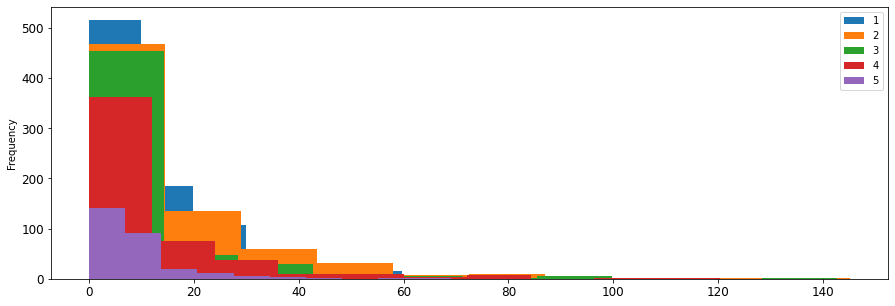

In [66]:
# Espaço para o script do Histograma por Estágio (número de corte)
ax = df.groupby('estagio').err_tch.plot(kind='hist', figsize=(15, 5), legend=True, fontsize=12)
plt.show()

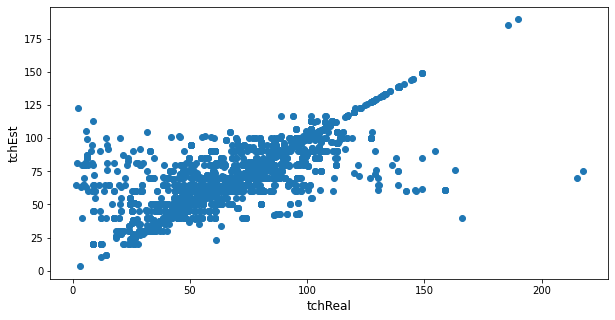

In [80]:
# Espaço para o script do Gráfico 'scatter' tchReal x tchEst
fig, axs = plt.subplots(figsize=(10,5), sharey=True);
axs.scatter(df.tchReal, df.tchEst);
axs.set_xlabel("tchReal", fontsize=12);
axs.set_ylabel("tchEst", fontsize=12);

### Questão 2.3.B (Valor: 0,75)

### Faça uma análise crítica dos resultados obtidos com os itens a seguir:

* Valores da produtividade estimada e real, quando o erro foi máximo  
* Estágio (número do corte) e variedade quando o erro foi máximo  
* Produtividade real média, máxima e mínima para esta variedade neste corte.


### Espaço para responder Questão 2.3.B

In [ ]:
# Espaço para a análise crítica relativa à Questão 2.3.B
Embora o maior erro da estimativa de produção com a real tenha sido do valor de 145, isso não significa, necessariamente que isso pode ter sido prejudicial a usina.
Pois vendo as características, vemos que a cana se tratava da variedade RB855453, que se dava pelo de melhor produção. 
E nesta safra (2015/2016), surpreendeu, quando o valor estimado era de apenas 70, ela teve uma produção real de 215.09. Bem maior que o esperado.

In [97]:
df.err_tch.max()

145.09

In [98]:
df.err_tch.idxmax()

3031

In [99]:
df.head(2135)

,Unnamed: 0,safra,codFaz,bloco,talhao,estagio,variedade,usina,ambProd,tchEst,tchReal,days,err_tch
0,0,21213,430001,1,1,4,RB855453,COR,B,60.00,56.30,412,3.70
1,1,21213,430001,1,2,4,SP813250,COR,B,80.00,75.07,412,4.93
2,2,21213,430001,1,3,4,SP813250,COR,B,80.00,74.95,407,5.05
3,3,21213,430001,1,4,4,SP813250,COR,B,80.00,72.89,402,7.11
10,10,21213,430001,1,10,4,RB855453,COR,B,60.00,56.29,412,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3031,21516,430017,1,6,2,RB867515,COR,G,70.00,215.09,318,145.09
3032,3032,21516,430017,1,7,2,RB867515,COR,G,65.00,97.86,318,32.86
3033,3033,21516,430017,1,8,2,RB867515,COR,G,70.00,76.35,317,6.35
3034,3034,21516,430017,1,9,2,RB867515,COR,G,73.78,120.07,318,46.29


In [ ]:
# Espaço para o script para encontrar valores da produtividade estimada e real, quando o erro foi máximo
Estimada = 70.00 
Real = 215.09

In [ ]:
# Espaço para o script para encontrar o estágio de corte e a variedade, quando o erro foi máximo
Estágio = 2,
Variedade = RB867515

In [110]:
# Espaço para o script para calcular produtividade real média, máxima e mínima para esta variedade neste corte
df.groupby('estagio').tchReal.mean()
# 2 -> 73.566020

estagio
1    78.154522
2    73.566020
3    71.067044
4    62.353084
5    51.157029
Name: tchReal, dtype: float64

In [102]:
df.groupby('estagio').tchReal.max()
#2-> 215.09

estagio
1    185.61
2    215.09
3    217.57
4    144.27
5    129.98
Name: tchReal, dtype: float64

## Questão 2.4 (Valor: 0,50)

Considere o erro entre a produtividade estimada e a produtividade real (colhida).
* Faça uma análise crítica dos resultados obtidos com as figuras solicitadas:

  - Gráfico 'scatter' estagio (eixo x) e tchErro (eixo y)  
  - Gráfico 'scatter' variedade (eixo x) e tchErro (eixo y)
  - Gráfico 'scatter' safra (eixo x) e tchErro (eixo y) 
  - Gráfico 'scatter' ambProd (eixo x) e tchErro (eixo y)

### Espaço para responder Questão 2.4

In [ ]:
# Espaço para a análise crítica relativa à Questão 2.4.A
Os gráficos remetem a relação dos erros com o estagio, variedade, safra e ambiente de produção, e assim a quantidade de erros para cada.

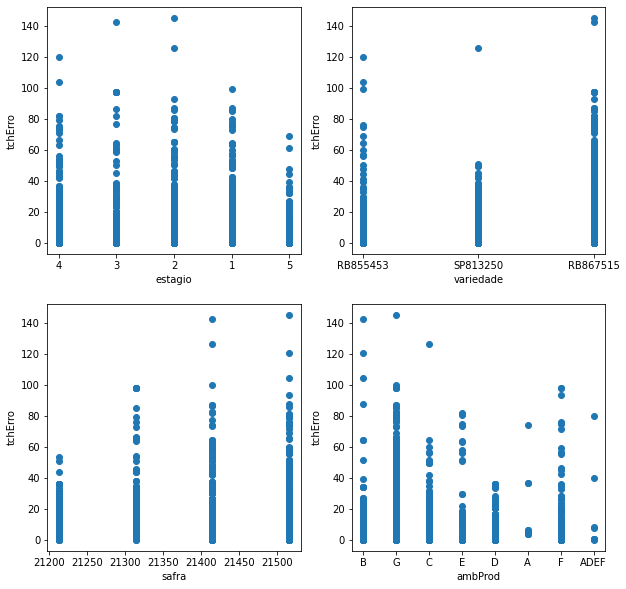

In [116]:
# Espaço para os scripts dos gráficos
plt.figure(figsize=(10,10));

plt.subplot(2,2,1);
plt.scatter(df.estagio, df.err_tch);
plt.xlabel('estagio')
plt.ylabel('tchErro');

plt.subplot(2,2,2);
plt.scatter(df.variedade, df.err_tch);
plt.xlabel('variedade')
plt.ylabel('tchErro');

plt.subplot(2,2,3);
plt.scatter(df.safra, df.err_tch);
plt.xlabel('safra')
plt.ylabel('tchErro');

plt.subplot(2,2,4);
plt.scatter(df.ambProd, df.err_tch);
plt.xlabel('ambProd')
plt.ylabel('tchErro');

# PARTE 3: MODELAGEM E AVALIAÇÃO DOS RESULTADOS (Valor Total: 5,0)

## Considere o conjunto de dados FA084-P1-Dataset-UCR.csv COM TODAS AS ALTERAÇÕES REALIZADAS nos itens 2.A, 2.B e 2.C (Parte 2).

## Para responder as questões 3.1 a 3.3, as instruções a seguir devem ser atendidas:  

* SEMPRE QUE PERTINENTE, utilizar random_state = 2020 

*	SEMPRE QUE PERTINENTE, transformar variáveis categóricas em numéricas  
OBS: Você deve escolher que método utilizar: One-Hot-Encode ou Label Encode  

*	SEMPRE QUE PERTINENTE, normalizar as variáveis numéricas (você escolhe o tipo de normalização)  

* SEMPRE OTIMIZAR os hiperparâmetros  
OBS: Você deve escolher como otimizar (GridSearchCV ou RandomizedSearchCV) e quais parâmetros otimizar,  
indicando a faixa (range) escolhida e o valor ótimo obtido.  

* SEMPRE CRIAR CONJUNTO DE TREINO e TESTE com PROPORÇÃO 70/30.  

* SEMPRE AVALIAR o modelo com RMSE e MAE no CONJUNTO DE TESTE.

SUGESTÃO: Verifique os atributos que podem ser excluídos. Por exemplo: atributos com valores únicos.



## Questão 3 - Construir modelos de regressão para predizer a Produtividade Real

OBS: Para construção dos modelos, EXCLUIR tchEst

3.A) ESCOLHA UMA entre as técnicas KNN, Árvore de Decisão e Regressão Linear  
  - Indicar a técnica escolhida, construir e avaliar o modelo.

3.B) ESCOLHA UMA entre as técnicas ‘ensemble’: RandomForest, GBoost e XGBoost
  - Indicar a técnica escolhida, construir e avaliar o modelo.

3.C) ESCOLHA UMA entre as técnicas SVM e Redes Neurais
  - Indicar a técnica escolhida, construir e avaliar o modelo.


---

Construir uma tabela (Data Frame) com a seguinte estrutura:

Linhas:  
  - Linha 1: RMSE  
  - Linha 2: MAE

Colunas:  
  - Coluna 1: KNN ou Árvore de Decisão ou Regressão Linear  
  - Coluna 2: Random Forest ou GBoost ou XGBoost  
  - Coluna 3: SVM ou Redes Neurais  
  - Coluna 4: Erro da Estimativa do Conjunto de Dados (tchEst)




In [117]:
df = pd.get_dummies(df)

In [118]:
df.head()

,Unnamed: 0,safra,codFaz,bloco,talhao,tchEst,tchReal,days,err_tch,estagio_1,estagio_2,estagio_3,estagio_4,estagio_5,variedade_RB855453,variedade_RB867515,variedade_SP813250,usina_COR,ambProd_A,ambProd_ADEF,ambProd_B,ambProd_C,ambProd_D,ambProd_E,ambProd_F,ambProd_G
0,0,21213,430001,1,1,60.0,56.30,412,3.70,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,21213,430001,1,2,80.0,75.07,412,4.93,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
2,2,21213,430001,1,3,80.0,74.95,407,5.05,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
3,3,21213,430001,1,4,80.0,72.89,402,7.11,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
10,10,21213,430001,1,10,60.0,56.29,412,3.71,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [120]:
df.shape

(2918, 26)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [123]:
y = df.tchReal
X = df.drop(['Unnamed: 0','tchEst','tchReal','err_tch'], axis=1)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2020)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2042, 22) (876, 22) (2042,) (876,)


In [130]:
#KNN
KNN = KNeighborsRegressor()
knn_range = [{'n_neighbors':np.arange(1,1001,2)}]
KNNSearch = RandomizedSearchCV(KNN,
                               param_distributions = knn_range,
                               n_iter = 9,
                               n_jobs = 3,
                               random_state = 2020)
KNNSearch.fit(X_train,y_train)
# Identificar o melhores valores para os parâmetros
otim_param_knn = KNNSearch.best_params_
otim_param_knn

{'n_neighbors': 79}

In [141]:
KNN = KNeighborsRegressor(n_neighbors=79)
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

In [133]:
#XGBoost
XGB = xgb.XGBRegressor(objective='reg:squarederror',
                       random_state=2020)
XGB_range =  [{'max_depth':np.arange(1,1500,1),
               'n_estimators':np.arange(1,1500,1)}]
XGBSearch = RandomizedSearchCV(XGB,
                               param_distributions = XGB_range,
                               n_iter = 9,
                               n_jobs = 3,
                               random_state = 2020)
XGBSearch.fit(X_train,y_train)
# Identificar o melhores valores para os parâmetros
otim_param_XGB = XGBSearch.best_params_
otim_param_XGB

{'max_depth': 14, 'n_estimators': 553}

In [135]:
XGB = xgb.XGBRegressor(objective='reg:squarederror',
                          max_depth =14,
                          n_estimators = 553,
                          random_state = 2020)
XGB.fit(X_train,y_train)
y_pred_XGB = XGB.predict(X_test)

In [136]:
#SVM
SVM = SVR(kernel='rbf')
SVM_range = [{'gamma':np.arange(0.01,1000,0.01),
              'C':np.arange(1e-3,1e3,1e-3)}]
SVMSearch = RandomizedSearchCV(SVM,
                               param_distributions = SVM_range,
                               n_iter = 9,
                               n_jobs = 3,
                               random_state = 2020)
SVMSearch.fit(X_train,y_train)
# Identificar o melhores valores para os parâmetros
otim_param_SVM = SVMSearch.best_params_
otim_param_SVM

{'C': 42.866, 'gamma': 651.3}

In [137]:
SVM = SVR(kernel='rbf',
          C=42.866,
          gamma= 651.3)
SVM.fit(X_train,y_train)
y_pred_SVM = SVM.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [143]:
rmse_knn = np.sqrt(mean_squared_error(y_test,y_pred_KNN))
mae_knn = mean_absolute_error(y_test,y_pred_KNN)

rmse_xgb = np.sqrt(mean_squared_error(y_test,y_pred_XGB))
mae_xgb = mean_absolute_error(y_test,y_pred_XGB)

rmse_svm = np.sqrt(mean_squared_error(y_test,y_pred_SVM))
mae_svm = mean_absolute_error(y_test,y_pred_SVM)

## Questão 3.1 (Valor: 1,0)

* Faça uma ANÁLISE CRÍTICA dos resultados, com base na tabela

In [151]:
# Espaço para script da construção da tabela (DataFrame)
data = pd.DataFrame({'Modelo': ['KNN',
                                'XGB',
                                'SVM'],
                    'RMSE': [rmse_knn,
                             rmse_xgb,
                             rmse_svm],
                   
                    'MAE': [mae_knn,
                            mae_xgb,
                            mae_svm]})
 
data_ordenado = data.sort_values(by='RMSE')
data_ordenado

,Modelo,RMSE,MAE
1,XGB,19.440073,8.875235
0,KNN,25.989326,19.801124
2,SVM,28.558632,21.861864


In [ ]:
# Espaço para a análise crítica relativa à Questão 3.1
Observamos que o modelo XGBoost apresentou um ser um melhor modelo para este conjunto de dados,
já que tanto o seu rmse quando o mae (que são diretamente relacionados) apresentaram um valor bem mais baixo em relação aos outros modelos.

## Questão 3.2 (Valor: 2,0)

* Construir quatro gráficos (2 linhas x 2 colunas) utilizando as mesmas escalas para os eixos x e y,   
com os histogramas dos erros dos modelos dos itens A, B e C   
acima e dos erros das estimativas do conjunto de dados.  

* Fazer uma ANÁLISE CRÍTICA dos resultados, com base nos gráficos.

In [184]:
err_KNN = abs(y_test - y_pred_KNN) 
err_XGB = abs(y_test - y_pred_XGB) 
err_SVM = abs(y_test - y_pred_SVM) 

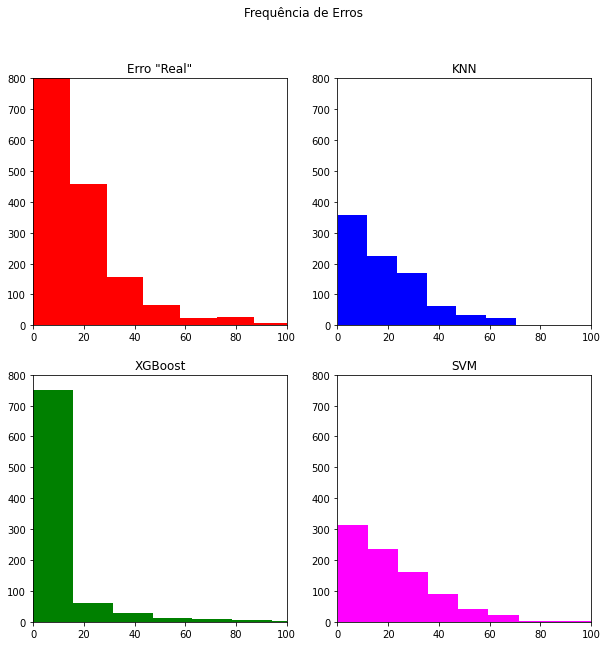

In [187]:
# Espaço para script da construção dos gráficos com histogramas dos erros
plt.figure(figsize=(10,10));
plt.suptitle("Frequência de Erros")

plt.subplot(2,2,1);
plt.hist(df.err_tch, bins=10, color= 'red');
plt.title('Erro "Real"');
plt.ylim(0, 800);
plt.xlim(0, 100);

plt.subplot(2,2,2);
plt.hist(err_KNN, bins=10, color= 'blue');
plt.title('KNN');
plt.ylim(0, 800);
plt.xlim(0, 100);

plt.subplot(2,2,3);
plt.hist(err_XGB, bins=10, color= 'green');
plt.title('XGBoost');
plt.ylim(0, 800);
plt.xlim(0, 100);

plt.subplot(2,2,4);
plt.hist(err_SVM, bins=10, color= 'magenta');
plt.title('SVM');
plt.ylim(0, 800);
plt.xlim(0, 100);

In [ ]:
# Espaço para a análise crítica relativa à Questão 3.2
Os histogramas nos permitem ver a frequência com que ocorreu os erros para cada um dos modelos criados,
Para o KNN, os erros estão bem distribuidos.
O SVM, embra apresente uma distribuição semelhante ao do KNN, teve alguns erros muito altos, ultrapassando 100. Isso comprova a grandeza do erro dado pelo RMSE.
O XGBoost, como já previsivel, apresentou uma frequência muito alta de erros de valores baixos, entre 0-20, como pode se analisar através dos histogramas.  

## Questão 3.3 (Valor: 2,0)

* Construir quatro gráficos 'scatter' (2 linhas x 2 colunas) utilizando as mesmas escalas para  
os eixos x e y, tendo no **"eixo x"** o **tchReal** e no **"eixo y"**, os **erros dos modelos**  
escolhidos acima e os erros das estimativas do conjunto de dados.


* Fazer uma ANÁLISE CRÍTICA dos resultados, com base nos gráficos.

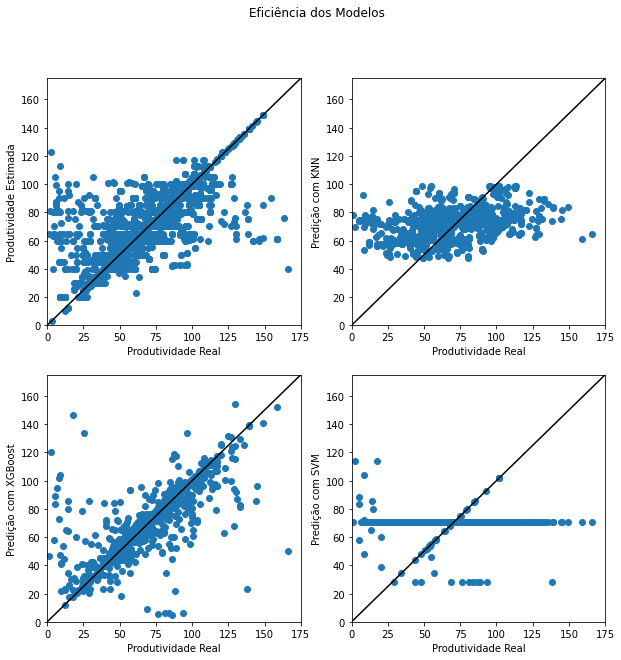

In [183]:
# Espaço para script da construção dos gráficos 'scatter' dos erros (eixo y) em função dos valores de tchReal (eixo x)
w1 = [0,200]
q = [0,200]

plt.figure(figsize=(10,10));
plt.suptitle("Eficiência dos Modelos")

plt.subplot(2,2,1);
plt.scatter(df.tchReal, df.tchEst);
plt.plot(w1, q, color="black");
plt.ylim(0, 175);
plt.xlim(0, 175);
plt.xlabel('Produtividade Real')
plt.ylabel('Produtividade Estimada');

plt.subplot(2,2,2);
plt.scatter(y_test, y_pred_KNN);
plt.plot(w1, q, color="black");
plt.ylim(0, 175);
plt.xlim(0, 175);
plt.xlabel('Produtividade Real')
plt.ylabel('Predição com KNN');

plt.subplot(2,2,3);
plt.scatter(y_test, y_pred_XGB);
plt.plot(w1, q, color="black");
plt.ylim(0, 175);
plt.xlim(0, 175);
plt.xlabel('Produtividade Real')
plt.ylabel('Predição com XGBoost');

plt.subplot(2,2,4);
plt.scatter(y_test, y_pred_SVM);
plt.plot(w1, q, color="black");
plt.ylim(0, 175);
plt.xlim(0, 175);
plt.xlabel('Produtividade Real')
plt.ylabel('Predição com SVM');

In [ ]:
# Espaço para a análise crítica relativa à Questão 3.3
Este gráfico, representa a relação das estimativas de produção feita pelos modelos com a produtividade real,
quando estes valores convergem, todos eles tendem a se aproximar de uma reta que está a diagonal do gráfico, sendo uma idealização para os modelos,
quanto mais próxima da reta, melhor o modelo.
Então observamos, que para o XGBoost, como apresentado ter uma menor erro em relação aos outros modelos, já era esperado que ele se aproximasse mais da linha "imaginária",
como foi confirmado visivelmente acima. No entando, os outros dois modelos não se tiveram um comportamento próximo a esta, concluindo não serem bons modelos para este conjunto de dados.